# Produce Hourly Shaped Hydro Profile for the Western Interconnection

In [1]:
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt

from powersimdata.network.usa_tamu.constants.zones import loadzone2state, state2loadzone
from powersimdata.scenario.scenario import Scenario
from powersimdata.input.grid import Grid

from prereise.gather.helpers import trim_eia_form_923
from prereise.gather.helpers import get_monthly_net_generation
from prereise.gather.hydrodata.eia.net_demand import get_net_demand_profile
from prereise.gather.hydrodata.eia.helpers import scale_profile
from prereise.gather.hydrodata.eia.decompose_profile import get_profile

In [2]:
s = Scenario("87")
hydro_scenario = s.state.get_hydro()

hydro_v2 = pd.DataFrame(index = hydro_scenario.index, columns = hydro_scenario.columns)

SCENARIO: base | WesternBase_2016_noHVDC_Final_2019Sep

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub
--> Loading ct
Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv
--> Loading hydro


Create an instance of the base grid

In [3]:
grid = Grid(["Western"])

Trim EIA form 923 to remove unnecessary columns

In [4]:
plant_generation = trim_eia_form_923('EIA923_Schedules_2_3_4_5_M_12_2016_Final_Revision.xlsx')

## 1. California Hydro Profile

### Calculate the net demand profile in California for the scenario

In [5]:
net_demand_ca = get_net_demand_profile('CA', s)

--> Loading wind
--> Loading solar
--> Loading demand


### Calculate the monthly total net generation from the 2016 EIA Form 923

In [6]:
hydro_monthly_generation_ca = get_monthly_net_generation('CA', plant_generation, 'hydro')

### Scale Hourly Net Demand Profile

In [7]:
total_hydro_profile_ca = scale_profile(net_demand_ca, hydro_monthly_generation_ca)

### Decompose Total Hydro Profile into Plant Level Profile

In [8]:
hydro_profile_ca = get_profile(total_hydro_profile_ca, 'CA')

In [9]:
hydro_profile_ca

plant_id,10816,10817,10820,10830,10831,10832,10833,10834,10835,10836,...,11785,11786,11787,11788,11838,11839,11843,11844,11845,11846
UTC Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,8.323058,1.718526,13.242760,14.938822,14.938822,0.786254,9.468742,9.468742,2.998997,2.998997,...,1.100755,1.100755,1.853313,1.853313,2.358761,2.358761,3.369659,3.369659,3.369659,3.369659
2016-01-01 01:00:00,9.332775,1.927010,14.849314,16.751135,16.751135,0.881639,10.617449,10.617449,3.362822,3.362822,...,1.234294,1.234294,2.078148,2.078148,2.644916,2.644916,3.778452,3.778452,3.778452,3.778452
2016-01-01 02:00:00,9.871265,2.038196,15.706102,17.717655,17.717655,0.932508,11.230063,11.230063,3.556853,3.556853,...,1.305511,1.305511,2.198055,2.198055,2.797525,2.797525,3.996464,3.996464,3.996464,3.996464
2016-01-01 03:00:00,10.816479,2.233362,17.210025,19.414193,19.414193,1.021800,12.305387,12.305387,3.897436,3.897436,...,1.430519,1.430519,2.408528,2.408528,3.065399,3.065399,4.379141,4.379141,4.379141,4.379141
2016-01-01 04:00:00,10.840355,2.238292,17.248013,19.457047,19.457047,1.024055,12.332549,12.332549,3.906039,3.906039,...,1.433677,1.433677,2.413844,2.413844,3.072165,3.072165,4.388807,4.388807,4.388807,4.388807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,16.852793,3.479726,26.814362,30.248602,30.248602,1.592032,19.172610,19.172610,6.072464,6.072464,...,2.228844,2.228844,3.752646,3.752646,4.776095,4.776095,6.822993,6.822993,6.822993,6.822993
2016-12-31 20:00:00,16.990961,3.508255,27.034201,30.496597,30.496597,1.605084,19.329798,19.329798,6.122249,6.122249,...,2.247118,2.247118,3.783412,3.783412,4.815252,4.815252,6.878932,6.878932,6.878932,6.878932
2016-12-31 21:00:00,17.022934,3.514857,27.085073,30.553983,30.553983,1.608104,19.366171,19.366171,6.133770,6.133770,...,2.251346,2.251346,3.790532,3.790532,4.824313,4.824313,6.891876,6.891876,6.891876,6.891876


In [10]:
for i in hydro_profile_ca.columns:
    hydro_v2[i] = hydro_profile_ca[i].copy()

## 2. Washington State Hydro profile

### Get Hourly Profile for Top 20 Dams in Washington from US Army Corps

In [11]:
filename = '../../data/western_hydro_generation.csv'
hydro_profile_army_corps = pd.read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)

### Calculate the monthly total net generation from the 2016 EIA Form 923

In [12]:
hydro_monthly_generation_wa = get_monthly_net_generation('WA', plant_generation, 'hydro')

### Scale Top 20 Dams Hourly Profile Based on EIA Monthly Total Net Genration

In [13]:
total_hydro_profile_wa = scale_profile(hydro_profile_army_corps, hydro_monthly_generation_wa)

### Decompose Total Hydro profile Plant Level Profile

In [14]:
hydro_profile_wa = get_profile(total_hydro_profile_wa, 'WA')

In [15]:
hydro_profile_wa

plant_id,10390,10391,10392,10393,10394,10395,10396,10398,10399,10402,...,10619,10620,10621,10622,10633,10634,10635,10636,10637,10638
UTC Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,63.568167,63.566970,63.566970,63.566970,63.566970,63.566970,5.148674,13.969271,13.969271,86.449833,...,3.192976,3.192976,3.192976,3.192976,51.486743,51.486743,51.486743,51.486743,51.486743,51.486743
2016-01-01 01:00:00,71.241748,71.240406,71.240406,71.240406,71.240406,71.240406,5.770192,15.655561,15.655561,96.885557,...,3.578414,3.578414,3.578414,3.578414,57.701924,57.701924,57.701924,57.701924,57.701924,57.701924
2016-01-01 02:00:00,79.348604,79.347109,79.347109,79.347109,79.347109,79.347109,6.426803,17.437064,17.437064,107.910514,...,3.985615,3.985615,3.985615,3.985615,64.268035,64.268035,64.268035,64.268035,64.268035,64.268035
2016-01-01 03:00:00,80.936308,80.934783,80.934783,80.934783,80.934783,80.934783,6.555399,17.785966,17.785966,110.069719,...,4.065364,4.065364,4.065364,4.065364,65.553988,65.553988,65.553988,65.553988,65.553988,65.553988
2016-01-01 04:00:00,79.922563,79.921058,79.921058,79.921058,79.921058,79.921058,6.473291,17.563193,17.563193,108.691073,...,4.014444,4.014444,4.014444,4.014444,64.732910,64.732910,64.732910,64.732910,64.732910,64.732910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,83.888398,83.886818,83.886818,83.886818,83.886818,83.886818,6.794502,18.434695,18.434695,114.084429,...,4.213645,4.213645,4.213645,4.213645,67.945020,67.945020,67.945020,67.945020,67.945020,67.945020
2016-12-31 20:00:00,82.232864,82.231315,82.231315,82.231315,82.231315,82.231315,6.660413,18.070888,18.070888,111.832978,...,4.130489,4.130489,4.130489,4.130489,66.604128,66.604128,66.604128,66.604128,66.604128,66.604128
2016-12-31 21:00:00,77.634219,77.632756,77.632756,77.632756,77.632756,77.632756,6.287948,17.060323,17.060323,105.579028,...,3.899502,3.899502,3.899502,3.899502,62.879476,62.879476,62.879476,62.879476,62.879476,62.879476


In [16]:
for i in hydro_profile_wa.columns:
    hydro_v2[i] = hydro_profile_wa[i].copy()

## 3. Other States in the Western Interconnection

In [17]:
states = ['OR','AZ','NV','ID','MT','UT','CO','NM']
for s in states:
    hydro_monthly_generation = get_monthly_net_generation(s, plant_generation, 'hydro')
    total_hydro_profile = scale_profile(hydro_profile_army_corps, hydro_monthly_generation)
    hydro_profile = get_profile(total_hydro_profile, s)
    for i in hydro_profile.columns:
        hydro_v2[i] = hydro_profile[i].copy()

## 4. Wyoming Hydro Profile
Washington state top 20 dams hourly profile is not suitable since it violates the maximum capacity in the peak hours. In this version, we apply a flat hourly profile based on the monthly total net generation from EIA 923 for WY in each month.

In [18]:
constant_hourly_profile = pd.Series([1] * 8784, index=hydro_v2.index)
hydro_monthly_generation_wy = get_monthly_net_generation('WY', plant_generation, 'hydro')
total_hydro_profile_wy = scale_profile(constant_hourly_profile, hydro_monthly_generation_wy)
hydro_profile_wy = get_profile(total_hydro_profile_wy, 'WY')
for i in hydro_profile_wy.columns:
    hydro_v2[i] = hydro_profile_wy[i].copy()

Store the final hydro v2 profile as a reference. Later we will roll back this profile based on TAMU hydro capacities 
to get the final hydro profile input of the simulation.

In [19]:
hydro_v2.to_csv('western_hydro_v2_reference.csv')

## 5. Sanity check

### The total net generation in each state and each month should match

In [20]:
hydro_v2.sum().sum()

174543031.14099982

In [21]:
hydro_monthly_generation = {}
for s in ['WA','OR','CA','NV','ID','CO','MT','NM','AZ','UT','WY']:
    hydro_monthly_generation_by_plant = plant_generation[(plant_generation['Plant State'] == s) & 
                                                         ((plant_generation['AER\nFuel Type Code'] == 'HYC') | 
                                                          (plant_generation['AER\nFuel Type Code'] == 'HPS'))].copy()
    # Drop unnecessary columns
    hydro_monthly_generation_by_plant.drop(hydro_monthly_generation_by_plant.columns[[0,1,2,3,4]], 
                                           axis=1, inplace=True)
    # Get monthly total net generation by summing up across plants with all positive values. 
    # Note that negative ones are included in actual demand
    hydro_monthly_generation[s] = list(hydro_monthly_generation_by_plant.replace('.',0).apply(
        lambda x: x[x>0].sum()).values)
sum_chk = 0
for val in hydro_monthly_generation.values():
    sum_chk += sum(val)
sum_chk

174543031.14099997

### Compare Energy Generated by Each Plant Each Hour to its Capacity in the Network
It should be lower than 1

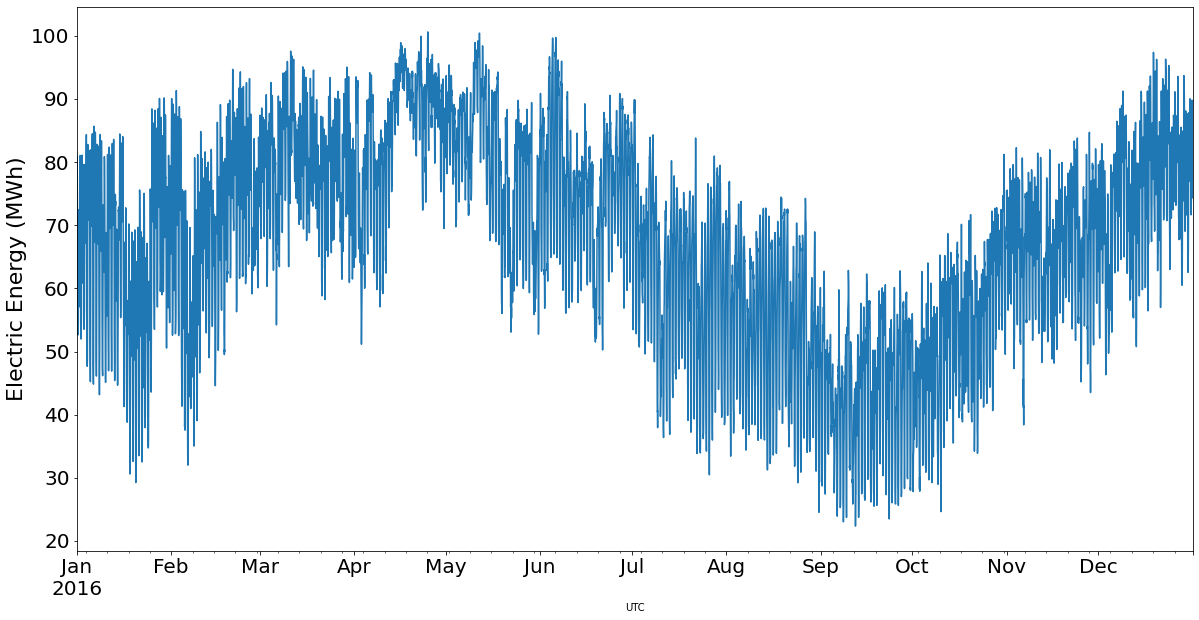

In [22]:
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
ax.tick_params(which='both', labelsize=20)
ax.set_xlabel("")
ax.set_ylabel("Electric Energy (MWh)", fontsize=22)
hydro_v2[hydro_v2.columns[0]].plot(ax=ax)

In [23]:
hydro_v2_factor = hydro_v2.copy()
for i in hydro_v2.columns:
    hydro_v2_factor[i] /= grid.plant.loc[i]["Pmax"]

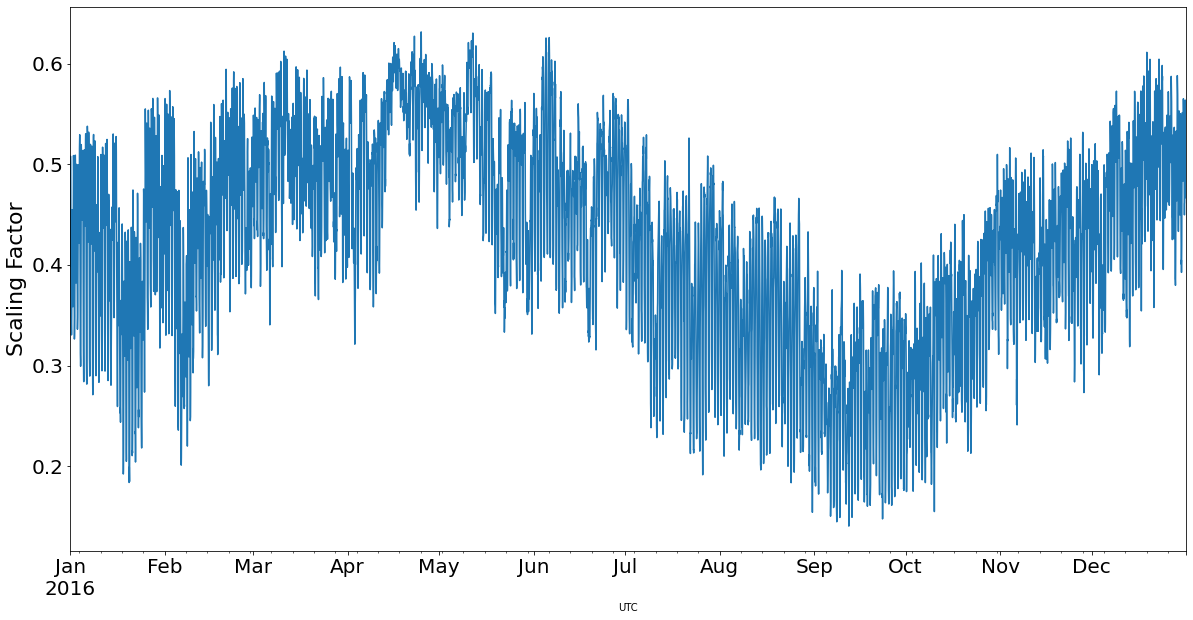

In [24]:
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
ax.tick_params(which='both', labelsize=20)
ax.set_ylabel("Scaling Factor", fontsize=22)
hydro_v2_factor[hydro_v2_factor.columns[0]].plot(ax=ax)

In [25]:
hydro_v2_factor.apply(lambda x: x>1).sum().sum()

10800

In [26]:
hydro_v2_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Columns: 715 entries, 10390 to 12863
dtypes: float64(715)
memory usage: 48.0 MB


### Compare Energy Generated by Each Plant Each Hour to the Capacity Reported by EIA

In [27]:
total_hydro_capacity = defaultdict(float)
for i in hydro_v2.columns:
    load_zone = grid.plant.loc[i]["zone_name"]
    if load_zone in state2loadzone["California"]:
        total_hydro_capacity['California'] += grid.plant.loc[i]["Pmax"]
    else:
        total_hydro_capacity[load_zone] += grid.plant.loc[i]["Pmax"]

eia_cap = {
    'Arizona': 2912,
    'California': 13801,
    'Colorado': 1178,
    'Idaho': 2543,
    'Montana Western': 2665,
    'Nevada':1052,
    'New Mexico Western': 82,
    'Oregon': 8451,
    'Utah': 262,
    'Washington': 21437,
    'Wyoming': 303
}
scaling_factor = {}
for s in eia_cap:
    f = eia_cap[s]/total_hydro_capacity[s]
    if s == "California":
        for l in state2loadzone[s]:
            scaling_factor[l] = f
    else:
        scaling_factor[s] = f

scaling_factor

{'Arizona': 1.0082404265632572,
 'Bay Area': 1.0635103145704918,
 'Central California': 1.0635103145704918,
 'Southwest California': 1.0635103145704918,
 'Southeast California': 1.0635103145704918,
 'Northern California': 1.0635103145704918,
 'Colorado': 1.1004203643157404,
 'Idaho': 1.0930136100180734,
 'Montana Western': 1.0375269406620238,
 'Nevada': 1.0121243258116719,
 'New Mexico Western': 1.2443095599393021,
 'Oregon': 1.01815609293111,
 'Utah': 1.4411441144114412,
 'Washington': 1.012717381460644,
 'Wyoming': 1.170788253477589}

In [28]:
total_hydro_capacity

defaultdict(float,
            {'Washington': 21167.800999999996,
             'Oregon': 8300.299,
             'California': 12976.837000000003,
             'Nevada': 1039.398,
             'Arizona': 2888.2000000000003,
             'Utah': 181.79999999999998,
             'New Mexico Western': 65.89999999999999,
             'Colorado': 1070.5,
             'Wyoming': 258.79999999999995,
             'Idaho': 2326.5950000000003,
             'Montana Western': 2568.608})

In [29]:
hydro_v2_factor_scale = hydro_v2.copy()
cnt = 0
for i in hydro_v2.columns:
    cap = grid.plant.loc[i]["Pmax"] * scaling_factor[grid.plant.loc[i]['zone_name']]
    hydro_v2_factor_scale[i] /= cap
    for index, val in hydro_v2_factor_scale[i].items():
        if val > 1:
            cnt += 1
            print(cnt, index, grid.plant.loc[i]['zone_name'], hydro_v2[i][index], cap, val)

In [30]:
hydro_v2_factor_scale.to_csv('western_hydro_v2_factor_reference.csv')

In [31]:
hydro_v2_factor_scale.apply(lambda x: x>1).sum().sum()

0

## 6. Generate Final Profile
The capacities in the TAMU network are used. This way, after we apply the change table function when creating the western base case scenario, this hydro profile will be scaled back to the profile we generated above: `western_hydro_v2_reference.csv`

In [32]:
hydro_v2_tamu_cap = hydro_v2.copy()
for i in hydro_v2.columns:
    hydro_v2_tamu_cap[i] /= scaling_factor[grid.plant.loc[i]['zone_name']]

In [33]:
hydro_v2_tamu_cap.to_csv('western_hydro_v2.csv')